<center><h2><b>Exploratory data analysis</b></h2></center>

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [5]:
# data
df = pd.read_csv("Salary Prediction of Data Professions.csv")
print(f"The data has {df.shape[0]} rows")

The data has 2639 rows


In [6]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [7]:
# Missing values
df.isna().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [8]:
# Percentage of missing values in each variable
for feature in df.columns:
    print(f"{feature} has {np.round(df[feature].isna().mean() * 100, 4)} % of missing values")

FIRST NAME has 0.0 % of missing values
LAST NAME has 0.0758 % of missing values
SEX has 0.0 % of missing values
DOJ has 0.0379 % of missing values
CURRENT DATE has 0.0 % of missing values
DESIGNATION has 0.0 % of missing values
AGE has 0.1137 % of missing values
SALARY has 0.0 % of missing values
UNIT has 0.0 % of missing values
LEAVES USED has 0.1137 % of missing values
LEAVES REMAINING has 0.0758 % of missing values
RATINGS has 0.0758 % of missing values
PAST EXP has 0.0 % of missing values


### There are some missing values, we can handle them in feature engineering

In [9]:
# Numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features

['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']

In [10]:
df[numerical_features].head()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,21.0,44570,24.0,6.0,2.0,0
1,NaN,89207,NaN,13.0,NaN,7
2,21.0,40955,23.0,7.0,3.0,0
3,22.0,45550,22.0,8.0,3.0,0
4,NaN,43161,27.0,3.0,NaN,3


In [11]:
# Date time features
datetime_features = ["DOJ", "CURRENT DATE"]
df[datetime_features].head()

,DOJ,CURRENT DATE
0,5-18-2014,01-07-2016
1,NaN,01-07-2016
2,7-28-2014,01-07-2016
3,04-03-2013,01-07-2016
4,11-20-2014,01-07-2016


In [12]:
# Date time exploration
for feature in datetime_features:
    df[feature] = pd.to_datetime(df[feature])

In [13]:
df[datetime_features].dtypes

DOJ             datetime64[ns]
CURRENT DATE    datetime64[ns]
dtype: object

In [14]:
df[datetime_features].head()

,DOJ,CURRENT DATE
0,2014-05-18,2016-01-07
1,NaT,2016-01-07
2,2014-07-28,2016-01-07
3,2013-04-03,2016-01-07
4,2014-11-20,2016-01-07


In [15]:
df["working_period"] = (df["CURRENT DATE"] - df["DOJ"]).dt.days

In [16]:
df["overall_experience"] = df["working_period"] + df["PAST EXP"] * 365 

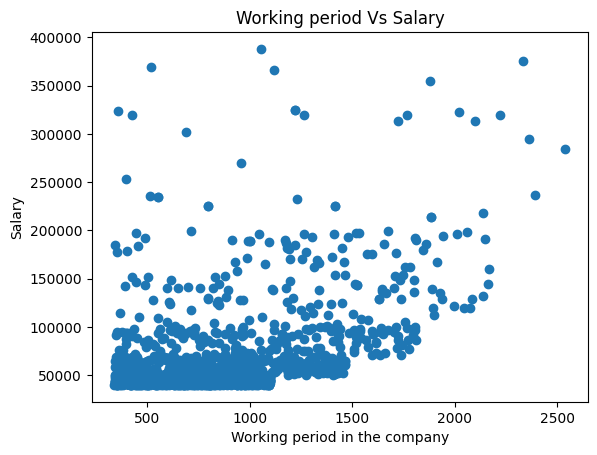

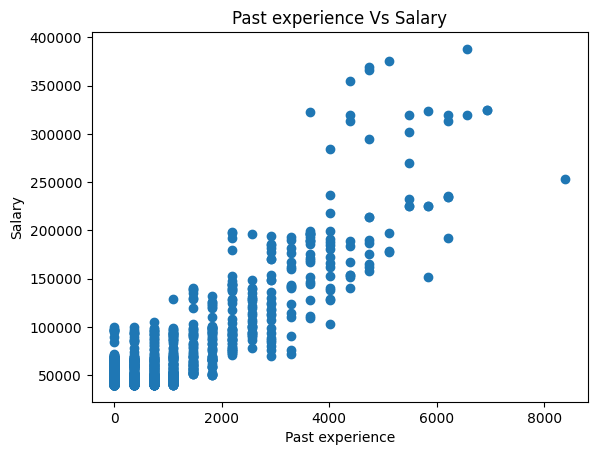

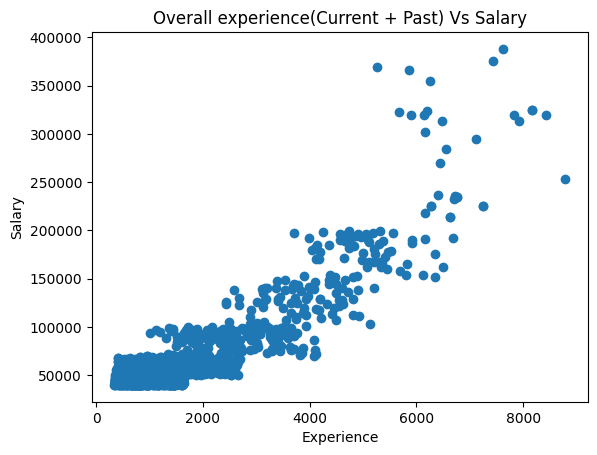

In [17]:
# salary vs date time features
plt.scatter(df["working_period"], df["SALARY"])
plt.xlabel("Working period in the company")
plt.ylabel("Salary")
plt.title("Working period Vs Salary")
plt.show()

plt.scatter(df["PAST EXP"] * 365, df["SALARY"])
plt.xlabel("Past experience")
plt.ylabel("Salary")
plt.title("Past experience Vs Salary")
plt.show()

plt.scatter(df["overall_experience"], df["SALARY"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Overall experience(Current + Past) Vs Salary")
plt.show()

### Clearly we can see here that the newly developed feature 'Experience' have some visible relationship with the salary than the working period in the company and past experience  

In [18]:
# Discrete features
discrete_features = [feature for feature in numerical_features if df[feature].nunique() <= 25]
discrete_features

['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']

In [19]:
# Continuous features
continuous_features = [feature for feature in numerical_features if df[feature].nunique() > 25]
continuous_features

['SALARY']

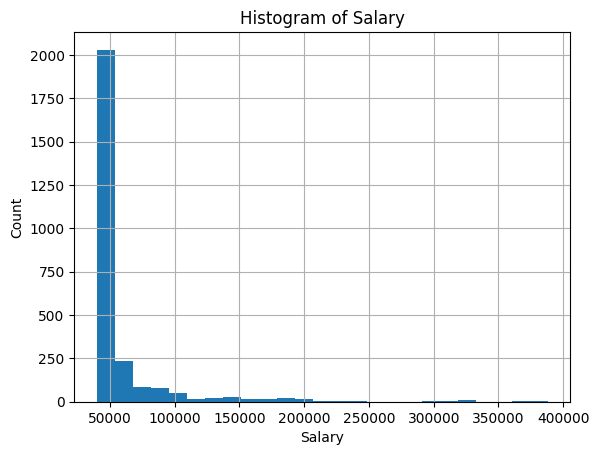

In [20]:
# Distrbution of 'SALARY'
df['SALARY'].hist(bins=25)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Histogram of Salary')
plt.show()
        

### Clearly, the salary is skewed and not normal, we may use normal transformation or use other regression models which has no normal distrbution assumption

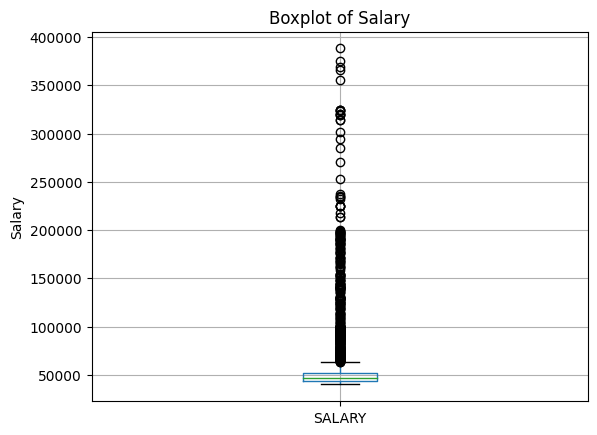

In [21]:
# Boxplot of 'SALARY'
df.boxplot(column = 'SALARY')
plt.ylabel('Salary')
plt.title('Boxplot of Salary')
plt.show()

### Clearly, there so many outliers in the salary, so we prefer median than mean for furthur aggregate calculations

In [22]:
df[discrete_features]

,AGE,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,21.0,24.0,6.0,2.0,0
1,NaN,NaN,13.0,NaN,7
2,21.0,23.0,7.0,3.0,0
3,22.0,22.0,8.0,3.0,0
4,NaN,27.0,3.0,NaN,3
...,...,...,...,...,...
2634,36.0,15.0,15.0,5.0,10
2635,23.0,17.0,13.0,2.0,0
2636,21.0,29.0,1.0,5.0,0
2637,24.0,23.0,7.0,3.0,1


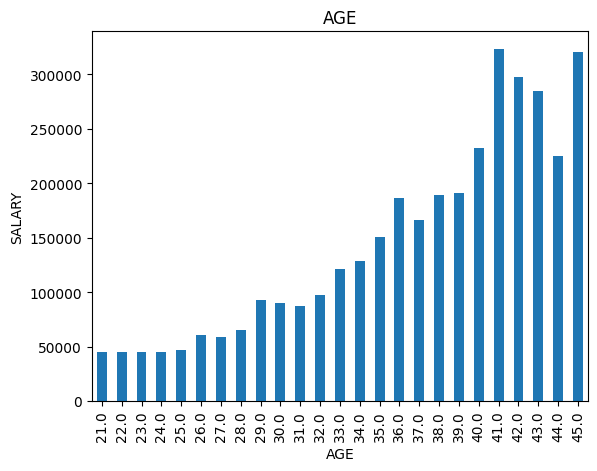

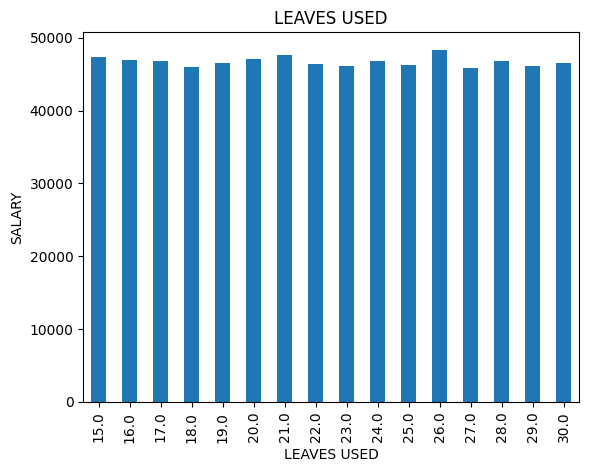

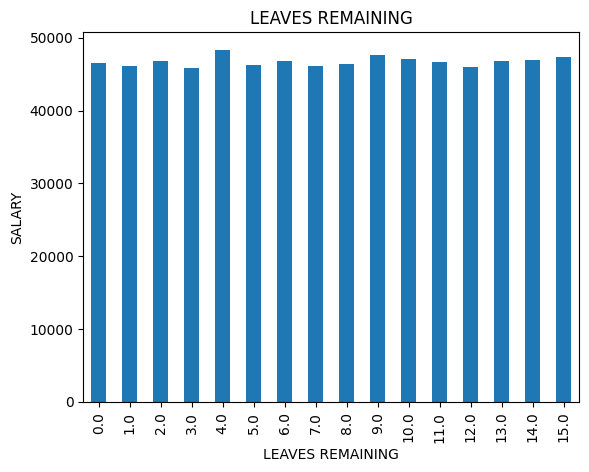

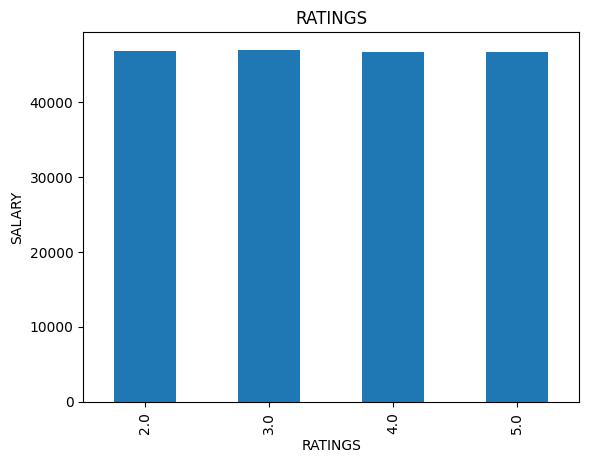

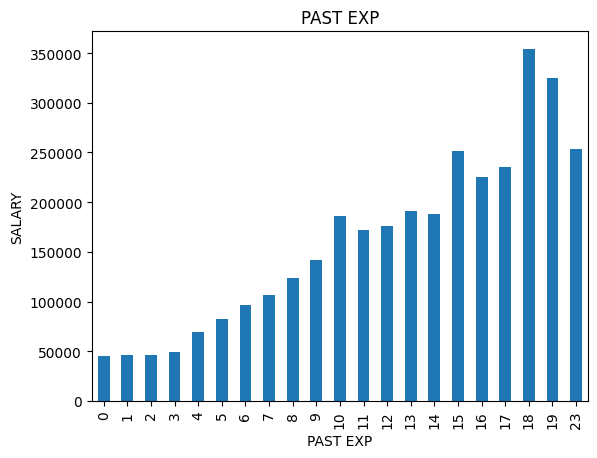

In [23]:
# Discrete features with 'SALARY'
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['SALARY'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SALARY')
    plt.title(feature)
    plt.show()

### Age and past experience has some relationship with salary

In [24]:
# Categorical features
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['FIRST NAME', 'LAST NAME', 'SEX', 'DESIGNATION', 'UNIT']

In [25]:
# Unimportant features
categorical_features.remove('FIRST NAME')
categorical_features.remove('LAST NAME')

In [26]:
categorical_features

['SEX', 'DESIGNATION', 'UNIT']

In [27]:
for feature in categorical_features:
    print(f'{feature}: {df[feature].nunique()} labels')    

SEX: 2 labels
DESIGNATION: 6 labels
UNIT: 6 labels


In [28]:
for feature in categorical_features:
    print(df[feature].value_counts(), end = "\n\n")

SEX
F    1344
M    1295
Name: count, dtype: int64

DESIGNATION
Analyst           1949
Senior Analyst     356
Associate          159
Manager             81
Senior Manager      62
Director            32
Name: count, dtype: int64

UNIT
IT            461
Finance       446
Operations    438
Marketing     438
Web           431
Management    425
Name: count, dtype: int64



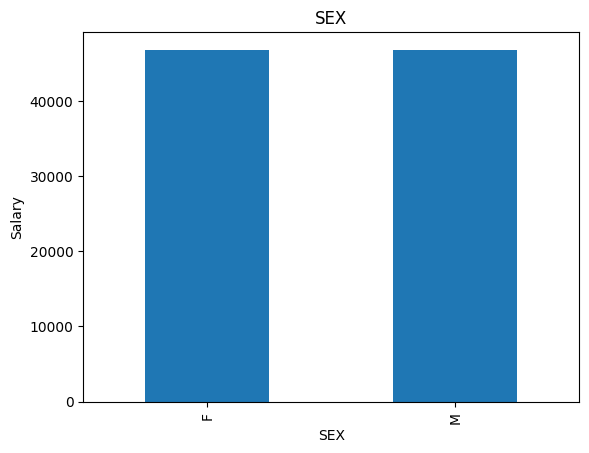

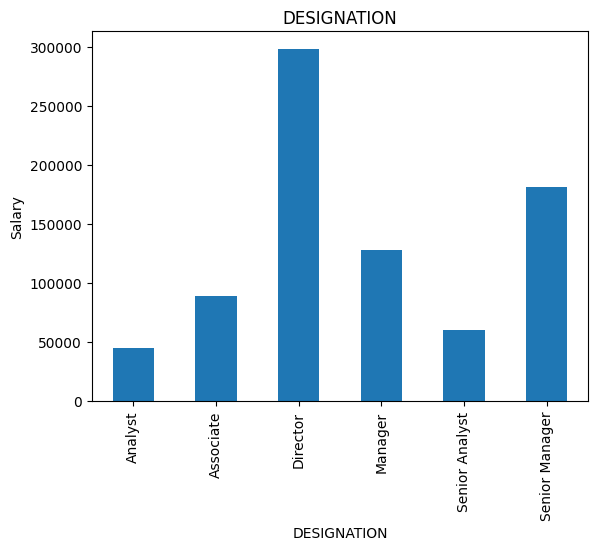

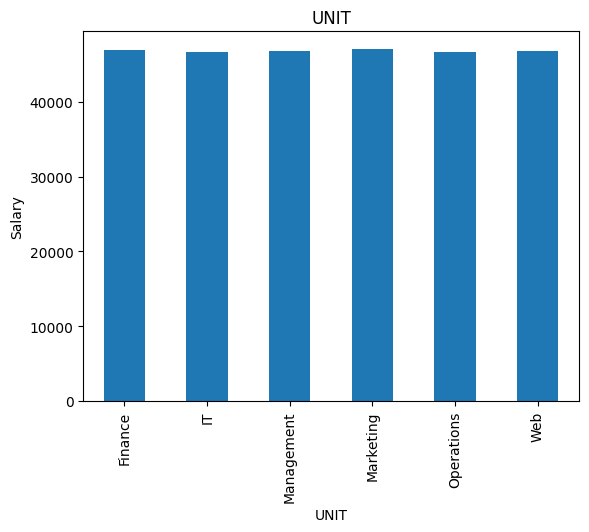

In [29]:
# Categorical features with 'SALARY'
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SALARY'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Salary')
    plt.title(feature)
    plt.show()

### Here designation has some relationship with salary

Text(0.5, 1.0, 'Correlation heatmap')

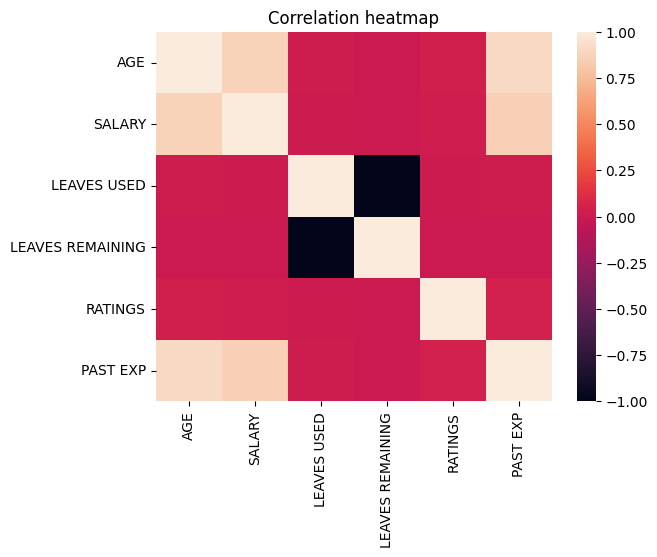

In [30]:
# Correlation
sns.heatmap(df[numerical_features].corr())
plt.title("Correlation heatmap")